#Task 2

![HW_3.2](https://drive.google.com/uc?id=1ES8W54v-svskv2x_U0qndd-f6Eh7F0Oq)

##You should find:
1. Simulate this mechanism (obtain all positions).
2. Find absolute, transport, and relative velocities and accelerations for $M$.
3. Find $t$ when $M$ leaves a channel.
4. Draw plots $v_{rel}$, $v_{tr}$, $a_{tr}$, $a_{rel}$, and $a$ with respect to time.

### Needed Variables:
- $\phi_e = f_1(t) = 0.2t^3 + t$
- $OM = s_r = f_2(t) = 5\sqrt{2}(t^2 + t)$
- $a = 60$, $\alpha = 45$


##Calculating the time when M leaves the channel.




In [ ]:

import sympy as sp
from sympy import Point, cos, sin, sqrt, pi, Matrix

O1A = 60
O1O = 60
OA = 60*sqrt(2)

t = sp.Symbol('t')

s = 5*sqrt(2)*(t**2 + t)
phi = 0.2*t**3 + t

t_solution = sp.solve(sp.Eq(s, OA), t)[1]
print(t_solution)


3


##Solution

In [13]:
import sympy as sp
from sympy import Point, cos, sin, sqrt, pi, Matrix

O1A = 60
O1O = 60
OA = 60*sqrt(2)

t = sp.Symbol('t')

s = 5*sqrt(2)*(t**2 + t)
phi = 0.2*t**3 + t

t_solution = sp.solve(sp.Eq(s, OA), t)

# Points
O1 = Point(80, 0)

A = Point(sp.cos(phi), sp.sin(phi))*O1A + O1
O = Point(sp.cos(phi - pi/2), sp.sin(phi - pi/2))*O1O + O1

OA_vector = A - O
OA_unit_vector = OA_vector / OA
# Scale OA_unit_vector by s to get the vector OM, then add to O to get M
M = O + OA_unit_vector * s


# Calculate the derivatives
omega = phi.diff(t)
epsilon = omega.diff(t)
v_relative_magnitude = s.diff(t)
a_relative_magnitude = v_relative_magnitude.diff(t)

v_transport_magnitude = omega*(M.distance(O1))
MO1_vector = O1 - M
MO1_rotated = Point(MO1_vector[1], -MO1_vector[0])

v_transport = MO1_rotated*v_transport_magnitude/M.distance(O1)

OA_vector = A - O
v_relative = OA_vector*v_relative_magnitude/OA
a_relative = OA_vector*a_relative_magnitude/OA

v_total = (M[0].diff(t)**2 + M[1].diff(t)**2)**0.5

acc_coriolis_magnitude = 2*omega*v_relative_magnitude
acc_coriolis = MO1_vector*acc_coriolis_magnitude/M.distance(O1)

acc_normal_magnitude = omega**2*M.distance(O1)
acc_normal = MO1_vector*acc_normal_magnitude/M.distance(O1)

acc_tangent_magnitude = epsilon*M.distance(O1)
acc_tangent = MO1_rotated*acc_tangent_magnitude/M.distance(O1)

In [14]:
from sympy import lambdify
import numpy as np


A_np = lambda t_val: (lambdify(t, A[0])(t_val), lambdify(t, A[1])(t_val))
O_np = lambda t_val: (lambdify(t, O[0])(t_val), lambdify(t, O[1])(t_val))
M_np = lambda t_val: (lambdify(t, M[0])(t_val), lambdify(t, M[1])(t_val))

v_relative_np = lambda t_val: (lambdify(t, v_relative[0])(t_val), lambdify(t, v_relative[1])(t_val))
v_transport_np = lambda t_val: (lambdify(t, v_transport[0])(t_val), lambdify(t, v_transport[1])(t_val))

acc_relative_np = lambda t_val: (lambdify(t, a_relative[0])(t_val), lambdify(t, a_relative[1])(t_val))

acc_coriolis_np = lambda t_val: (lambdify(t, acc_coriolis[0])(t_val), lambdify(t, acc_coriolis[1])(t_val))
acc_normal_np = lambda t_val: (lambdify(t, acc_normal[0])(t_val), lambdify(t, acc_normal[1])(t_val))
acc_tangent_np = lambda t_val: (lambdify(t, acc_tangent[0])(t_val), lambdify(t, acc_tangent[1])(t_val))


t_vals = np.linspace(0, 3, 130)
points_vals = [(A_np(t_val), O_np(t_val), M_np(t_val)) for t_val in t_vals]
relative_velocities_vals = [(v_relative_np(t_val)[0]**2 + v_relative_np(t_val)[1]**2)**0.5 for t_val in t_vals]
transport_velocities_vals = [(v_transport_np(t_val)[0]**2 + v_transport_np(t_val)[1]**2)**0.5 for t_val in t_vals]

velocities_vals = [(v_relative_np(t_val), v_transport_np(t_val)) for t_val in t_vals]

acc_relative_vals = [(acc_relative_np(t_val)[0]**2 + acc_relative_np(t_val)[1]**2)**0.5 for t_val in t_vals]
acc_coriolis_vals = [(acc_coriolis_np(t_val)[0]**2 + acc_coriolis_np(t_val)[1]**2)**0.5 for t_val in t_vals]
acc_normal_vals = [(acc_normal_np(t_val)[0]**2 + acc_normal_np(t_val)[1]**2)**0.5 for t_val in t_vals]
acc_tangent_vals = [(acc_tangent_np(t_val)[0]**2 + acc_tangent_np(t_val)[1]**2)**0.5 for t_val in t_vals]
acc_total_vals = [((acc_tangent_np(t_val)[0] + acc_normal_np(t_val)[0] + acc_coriolis_np(t_val)[0] + acc_relative_np(t_val)[0])**2 + ((acc_tangent_np(t_val)[1] + acc_normal_np(t_val)[1] + acc_coriolis_np(t_val)[1] + acc_relative_np(t_val)[1])**2))**0.5 for t_val in t_vals]

accelerations_vals = [(acc_relative_np(t_val), acc_coriolis_np(t_val), acc_normal_np(t_val), acc_tangent_np(t_val)) for t_val in t_vals]

##Plotting

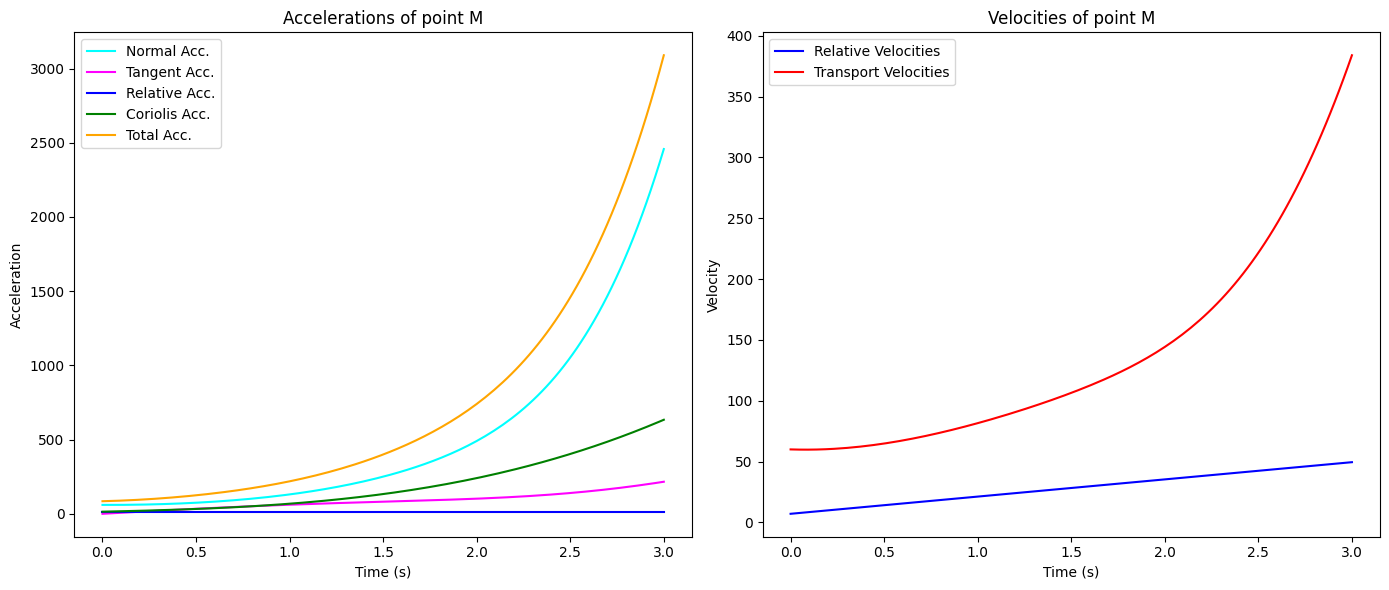

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Second subplot for accelerations
plt.subplot(1, 2, 1)
plt.plot(t_vals, acc_normal_vals, color='cyan', label='Normal Acc.')
plt.plot(t_vals, acc_tangent_vals, color='magenta', label='Tangent Acc.')
plt.plot(t_vals, acc_relative_vals, color='blue', label='Relative Acc.')
plt.plot(t_vals, acc_coriolis_vals, color='green', label='Coriolis Acc.')
plt.plot(t_vals, acc_total_vals, color='orange', label='Total Acc.')
plt.title('Accelerations of point M')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()

# Second subplot for velocities
plt.subplot(1, 2, 2)
plt.plot(t_vals, relative_velocities_vals, color='blue', label='Relative Velocities')
plt.plot(t_vals, transport_velocities_vals, color='red', label='Transport Velocities')
plt.title('Velocities of point M')
plt.xlabel('Time (s)')
plt.ylabel('Velocity')
plt.legend()

plt.tight_layout()
plt.show()


##Simulation

In [11]:
from sympy import *
from sympy import Symbol, Ellipse, Point, Line, Circle, Matrix, diff
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.lines as mlines
import numpy as np


points_names = ["A", "O", "M"]

states = zip(points_vals, velocities_vals, accelerations_vals)


fixed_points_with_names = [(O1, "O1")]


fig, ax = plt.subplots()
ax.set_aspect("equal")


xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')

vectors = []
points  = []

titles  = []
lines   = []

# Animation initialisation
def init_model():
    ax.set_xlim(0, 210)
    ax.set_ylim(-70, 70)
    plt.title('Task2')
    return ln,


# Remove all the previous points, labels, vectors
def clear_screen():
    if len(ax.patches):
        ax.patches[-1].remove()

    while len(points):
        for item in points[-1]:
            item.remove()
        points.pop()

    while len(lines):
        for item in lines[-1]:
            item.remove()
        lines.pop()

    while len(titles):
        titles[-1].remove()
        titles.pop()

    while len(vectors):
        vectors[-1].remove()
        vectors.pop()

# Animation update on each frame
def update_model(state):

    clear_screen()

    (positions, velocities, accelerations) = state
    # position = state


    (A, O, M) = positions
    (v_rel, v_tr) = velocities
    (acc_rel, acc_cor, acc_nor, acc_tang) = accelerations
    # Draw all moving points of interest on the screen
    points.extend([
        plt.plot(i[0], i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for i in (A, O, M)
    ])

    def isBetween(a, b, c):
        epsilon = 0.001
        crossproduct = (c[1] - a[1]) * (b[0] - a[0]) - (c[0] - a[0]) * (b[1] - a[1])

        # compare versus epsilon for floating point values, or != 0 if using integers
        if abs(crossproduct) > epsilon:
            return False

        dotproduct = (c[0] - a[0]) * (b[0] - a[0]) + (c[1] - a[1])*(b[1] - a[1])
        if dotproduct < 0:
            return False

        squaredlengthba = (b[0] - a[0])*(b[0] - a[0]) + (b[1] - a[1])*(b[1] - a[1])
        if dotproduct > squaredlengthba:
            return False

        return True


    if isBetween(A, O, M):
        points.extend([
            plt.plot(M[0], M[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        ])

    # Draw all fixed points
    points.extend([
        plt.plot(point[0], point[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for (point, _) in fixed_points_with_names
    ])

    # (A_velocity, B_velocity, C_velocity, D_velocity, E_velocity, F_velocity) = velocity
    # (A_acceleration, B_acceleration, C_acceleration, D_acceleration, E_acceleration, F_acceleration) = acceleration


    # Plot all lines on the screen
    lines.extend([
        plt.plot([A[0], O1[0]], [A[1], O1[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([O[0], O1[0]], [O[1], O1[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([A[0], O[0]], [A[1], O[1]], linestyle="solid", linewidth=2, color="blue")
    ])

    # Add titles to points on the plot
    titles.extend([
        ax.text(i[0][0], i[0][1] + 3, i[1], fontsize=10)
        for i in zip((A, O, M), ("A", "O", "M"))
    ])

    if isBetween(A, O, M):
        titles.extend([
        ax.text(M[0], M[1] + 3, "M", fontsize=10)
    ])


    # Add titles
    if isBetween(A, O, M):
      titles.extend([
          ax.text(M[0]+vec[0]/2, M[1]+vec[1]/2, name, fontsize=10)
          for name, vec in (("v_rel", v_rel), ("v_tr", v_tr), ("acc_rel", acc_rel), ("acc_cor", acc_cor), ("acc_nor", acc_nor), ("acc_tang", acc_tang))
      ])


    # Draw all tiltles of fixed points
    titles.extend([
        ax.text(point[0], point[1] + 3, name, fontsize=10)
        for (point, name) in fixed_points_with_names
    ])
        # Draw all the velocity vectors on the plot
    if isBetween(A, O, M):
        vectors.extend([
            plt.quiver([float(M[0])], [float(M[1])], [float(v_rel[0])], [float(v_rel[1])], color="black", units='xy', scale = 2, scale_units='xy', angles='xy')

        ])

    if isBetween(A, O, M):
        vectors.extend([
            plt.quiver([float(M[0])], [float(M[1])], [float(v_tr[0])], [float(v_tr[1])], color="cyan", units='xy', scale = 2, scale_units='xy', angles='xy')

        ])

    if isBetween(A, O, M):
        vectors.extend([
            plt.quiver([float(M[0])], [float(M[1])], [float(acc_rel[0])], [float(acc_rel[1])], color="red", units='xy', scale = 2, scale_units='xy', angles='xy')

        ])

    if isBetween(A, O, M):
        vectors.extend([
            plt.quiver([float(M[0])], [float(M[1])], [float(acc_cor[0])], [float(acc_cor[1])], color="orange", units='xy', scale = 2, scale_units='xy', angles='xy')

        ])

    if isBetween(A, O, M):
        vectors.extend([
            plt.quiver([float(M[0])], [float(M[1])], [float(acc_nor[0])], [float(acc_nor[1])], color="magenta", units='xy', scale = 2, scale_units='xy', angles='xy')

        ])

    if isBetween(A, O, M):
        vectors.extend([
            plt.quiver([float(M[0])], [float(M[1])], [float(acc_tang[0])], [float(acc_tang[1])], color="green", units='xy', scale = 2, scale_units='xy', angles='xy')

        ])


    # # Draw all the total acceleration vectors on the plot
    # vectors.extend([
    #     plt.quiver([float(pos[0].evalf())], [float(pos[1].evalf())], [float(acc[0])], [float(acc[1])], color="green", units='xy', scale = 2, scale_units='xy', angles='xy')
    #     for (pos, acc) in zip(position, acceleration)
    # ])
    add_legend()
    return ln,

    # Function to add a legend for vectors
def add_legend():
    legend_entries = [
        mlines.Line2D([], [], color='black', marker='_', linestyle='None', markersize=10, label='Velocity (relative)'),
        mlines.Line2D([], [], color='cyan', marker='_', linestyle='None', markersize=10, label='Velocity (translational)'),
        mlines.Line2D([], [], color='red', marker='_', linestyle='None', markersize=10, label='Acceleration (relative)'),
        mlines.Line2D([], [], color='orange', marker='_', linestyle='None', markersize=10, label='Acceleration (Coriolis)'),
        mlines.Line2D([], [], color='magenta', marker='_', linestyle='None', markersize=10, label='Acceleration (normal)'),
        mlines.Line2D([], [], color='green', marker='_', linestyle='None', markersize=10, label='Acceleration (tangential)'),
    ]

    ax.legend(handles=legend_entries, loc='upper right')


anim = FuncAnimation(fig, update_model, frames=states,
                        init_func=init_model, blit=True)


from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)

<ipython-input-11-81ce35827726>:206: UserWarning: frames=<zip object at 0x7813f15daf00> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update_model, frames=states,
